# GALAH DR3 stellar abundance plots

Figure 1.9 from Chapter 1 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of [Mg/Fe] vs. [Fe/H] and [Ba/Fe] vs. [Fe/H] for 85,000 main sequence stars observed
with the [GALAH survey Third Data Release](https://www.galah-survey.org/dr3/overview/).


In [5]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [6]:
plotFile = 'Fig1_9.png' 

# graphic aspect ratio = width/height

aspect = 3.0/4.0 # 4:3 portrait

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## GALAH DR3 Data

Data file is `GALAH_DR3.dat`, derived from the electronic version of Table x from CITATION.  Data are
reduced to 3 columns from the original source:
 * fe_h = [Fe/H] in solar units
 * mg_fe = [Mg/Fe] in solar units
 * ba_fe = [Ba/Fe] in solar units


In [7]:
dataFile = 'GALAH_DR3.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
FeH= np.array(data['fe_h'])
MgFe = np.array(data['mg_fe'])
BaFe = np.array(data['ba_fe'])
            
minFeH = -1.4
maxFeH = 0.6
minXFe = -0.4 # goof for Mg/Fe and Ba/Fe plots
maxXFe = 0.6

## Fig 1.9 - [Mg/Fe] and [Ba/Fe] vs. [Fe/H]

Two panel plot
 * Top: [Mg/Fe] vs. [Fe/H]
 * Bot: [Ba/Fe] vs. [Fe/H]


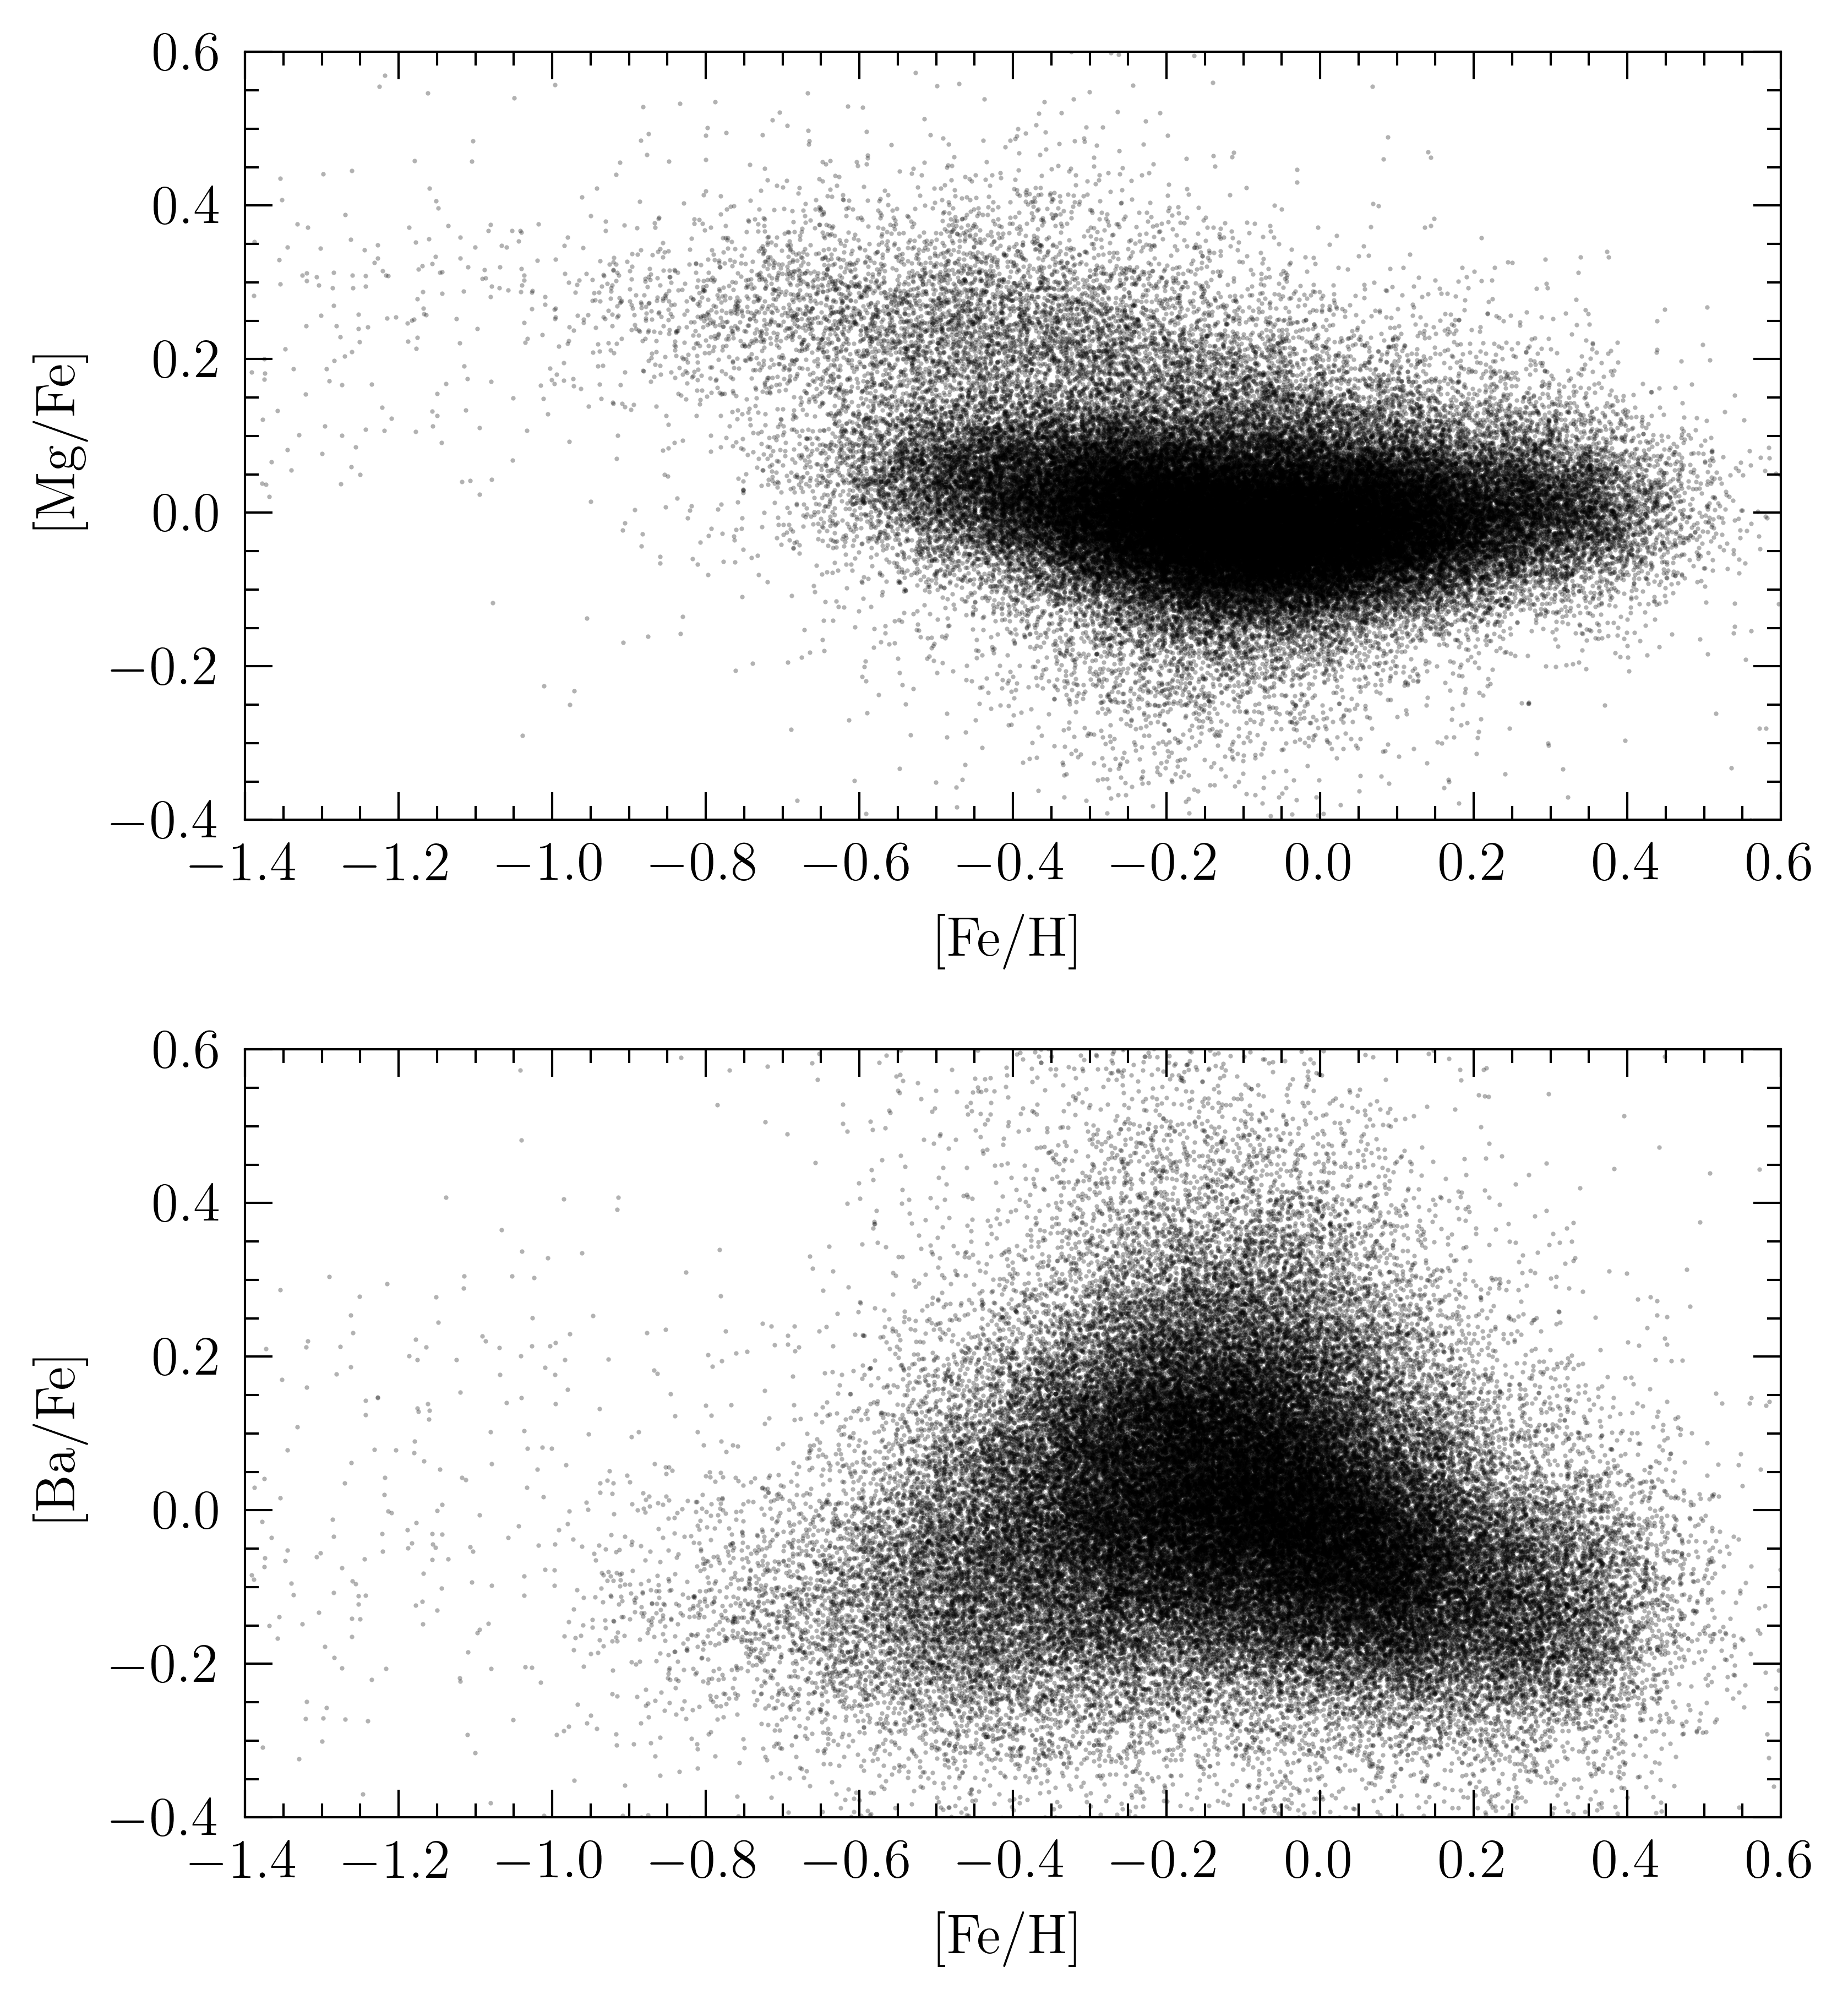

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0, hspace=0)

# Top panel: [Mg/Fe] vs [Fe/H]

ax1.set_xlim(minFeH,maxFeH)
ax1.set_ylim(minXFe,maxXFe)
ax1.set_aspect('equal')

ax1.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.xaxis.set_major_locator(MultipleLocator(0.20))
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.set_xlabel(r'[Fe/H]')
ax1.yaxis.set_major_locator(MultipleLocator(0.20))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
ax1.set_ylabel(r'[Mg/Fe]', fontsize=axisFontSize)

ax1.plot(FeH,MgFe,'o',color='black',mew=0,ms=1,alpha=0.3)

# Bottom Panel: [Ba/Fe] vs [Fe/H]

ax2.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(minFeH,maxFeH)
ax2.set_ylim(minXFe,maxXFe)
ax2.set_aspect('equal')
ax2.xaxis.set_major_locator(MultipleLocator(0.20))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_xlabel(r'[Fe/H]', fontsize=axisFontSize)
ax2.yaxis.set_major_locator(MultipleLocator(0.20))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylabel(r'[Ba/Fe]', fontsize=axisFontSize)

ax2.plot(FeH,BaFe,'o',color='black',mew=0,ms=1,alpha=0.3)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')